In [1]:
# Pobieranie bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


pd.set_option("display.max_columns", None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
# Załadowanie datasetu

df = pd.read_csv('/Users/iMac/Documents/Event datasets/multistore/2019-Dec.csv')
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,view,1005105,2232732093077520756,construction.tools.light,apple,1302.48,556695836,ca5eefc5-11f9-450c-91ed-380285a0bc80
1,2019-12-01 00:00:00 UTC,view,22700068,2232732091643068746,NaN,force,102.96,577702456,de33debe-c7bf-44e8-8a12-3bf8421f842a
2,2019-12-01 00:00:01 UTC,view,2402273,2232732100769874463,appliances.personal.massager,bosch,313.52,539453785,5ee185a7-0689-4a33-923d-ba0130929a76
3,2019-12-01 00:00:02 UTC,purchase,26400248,2053013553056579841,computers.peripherals.printer,NaN,132.31,535135317,61792a26-672f-4e61-9832-7b63bb1714db
4,2019-12-01 00:00:02 UTC,view,20100164,2232732110089618156,apparel.trousers,nika,101.68,517987650,906c6ca8-ff5c-419a-bde9-967ba8e2233e


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67542878 entries, 0 to 67542877
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 4.5+ GB


In [4]:
df.isnull().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    7088848
brand            8122410
price                  0
user_id                0
user_session          21
dtype: int64

In [7]:
print(df.duplicated().sum())

112119


In [ ]:
df_1 = df.drop_duplicates()

In [23]:
df_1.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,view,1005105,2232732093077520756,construction.tools.light,apple,1302.48,556695836,ca5eefc5-11f9-450c-91ed-380285a0bc80
1,2019-12-01 00:00:00 UTC,view,22700068,2232732091643068746,NaN,force,102.96,577702456,de33debe-c7bf-44e8-8a12-3bf8421f842a
2,2019-12-01 00:00:01 UTC,view,2402273,2232732100769874463,appliances.personal.massager,bosch,313.52,539453785,5ee185a7-0689-4a33-923d-ba0130929a76
3,2019-12-01 00:00:02 UTC,purchase,26400248,2053013553056579841,computers.peripherals.printer,NaN,132.31,535135317,61792a26-672f-4e61-9832-7b63bb1714db
4,2019-12-01 00:00:02 UTC,view,20100164,2232732110089618156,apparel.trousers,nika,101.68,517987650,906c6ca8-ff5c-419a-bde9-967ba8e2233e


In [ ]:
#Posegregowanie kolumn na te które posiadają wartości kategoryczne i numeryczne

object_columns  = df_1.select_dtypes(['object']).columns

int_columns  = df_1.select_dtypes(['int64']).columns

print(object_columns)
print(int_columns)

Index(['event_time', 'event_type', 'category_code', 'brand', 'user_session'], dtype='object')
Index(['product_id', 'category_id', 'user_id'], dtype='object')


In [9]:
df_1.describe()

,product_id,category_id,price,user_id
count,67430759.00,67430759.00,67430759.00,67430759.00
mean,17632129.80,2179029002724050688.00,274.81,548109128.18
std,27307943.11,81677991335484688.00,348.11,28593510.20
min,1000544.00,2053013551865397504.00,0.00,29515875.00
25%,1005273.00,2053013563693335296.00,61.46,518836205.00
50%,5300101.00,2232732093077520640.00,154.42,546861340.00
75%,21404032.00,2232732097708032512.00,332.03,573971369.00
max,100064491.00,2232732138325672448.00,2574.07,595414563.00


In [19]:
#Przegląd wartości i ich liczebności w zmiennych kategorycznych

for col in object_columns:
    print(df_1[col].value_counts())
    print("\n**************\n")

event_time
2019-12-25 15:46:35 UTC    146
2019-12-26 05:45:32 UTC    143
2019-12-24 09:13:14 UTC    142
2019-12-29 14:20:50 UTC    139
2019-12-29 10:55:06 UTC    138
                          ... 
2019-12-08 23:20:25 UTC      1
2019-12-08 23:20:21 UTC      1
2019-12-08 23:20:14 UTC      1
2019-12-08 23:20:04 UTC      1
2019-12-10 23:30:23 UTC      1
Name: count, Length: 2654047, dtype: int64

**************

event_type
view        62984129
cart         3284602
purchase     1162028
Name: count, dtype: int64

**************

category_code
construction.tools.light            16472151
electronics.clocks                   2738224
appliances.personal.massager         2608270
apparel.shoes                        2539909
appliances.kitchen.refrigerators     2397766
                                      ...   
appliances.environment.fan              5347
appliances.kitchen.microwave            3594
computers.components.sound_card         3470
auto.accessories.light                   632
country

/var/folders/rj/74569_hj08dczy17w0prp9br0000gp/T/ipykernel_15907/1416269897.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases['hour'] = purchases['event_time'].dt.hour


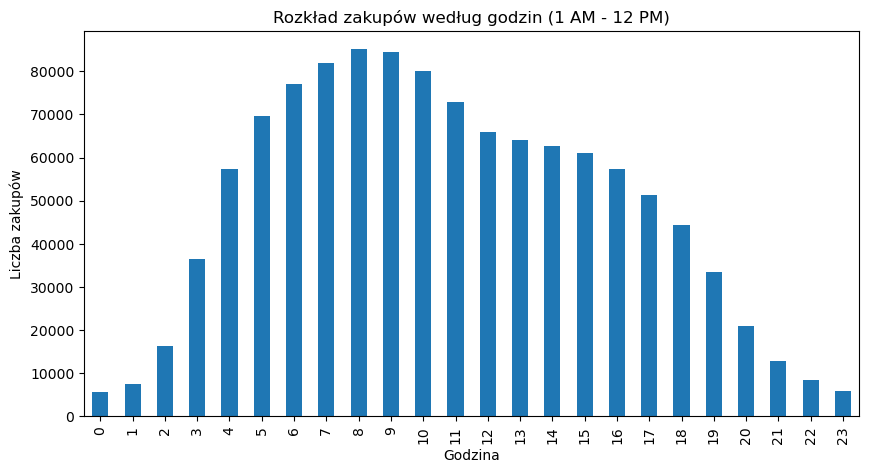

In [24]:
# Filtruj zdarzenia typu 'purchase'
purchases = df[df['event_type'] == 'purchase']

# Wyciągnij godzinę z czasu zdarzenia
purchases['hour'] = purchases['event_time'].dt.hour

# Grupuj zakupy według godzin
hourly_purchases = purchases['hour'].value_counts().sort_index()

# Wizualizacja
hourly_purchases.plot(kind='bar', title='Rozkład zakupów według godzin (1 AM - 12 PM)', figsize=(10, 5))
plt.xlabel('Godzina')
plt.ylabel('Liczba zakupów')
plt.show()


/var/folders/rj/74569_hj08dczy17w0prp9br0000gp/T/ipykernel_15907/3612480547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases['weekday'] = purchases['event_time'].dt.day_name()  # Nazwa dnia tygodnia


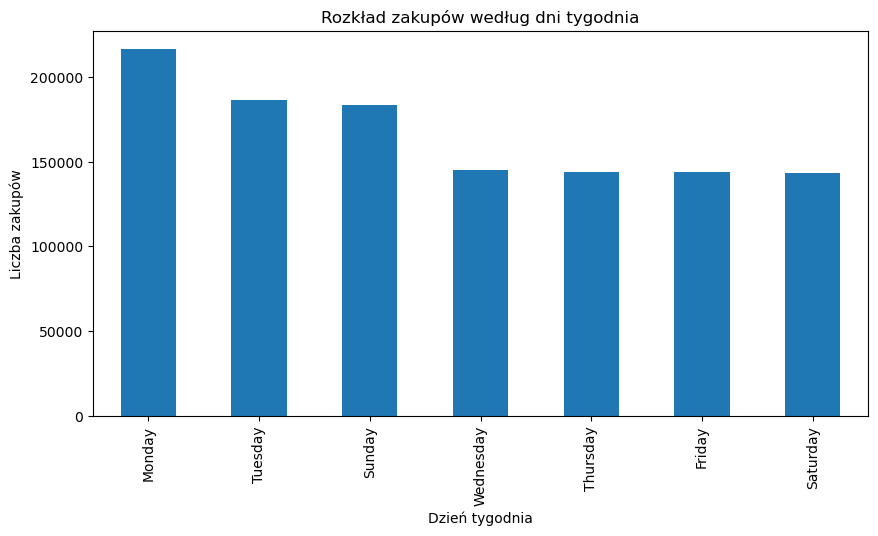

In [ ]:
# Wyciągnij dzień tygodnia z czasu zdarzenia
purchases['weekday'] = purchases['event_time'].dt.day_name()  # Nazwa dnia tygodnia

# Grupuj zakupy według dni tygodnia
weekday_purchases = purchases['weekday'].value_counts()

# Wizualizacja
weekday_purchases.plot(kind='bar', title='Rozkład zakupów według dni tygodnia', figsize=(10, 5))
plt.xlabel('Dzień tygodnia')
plt.ylabel('Liczba zakupów')
plt.show()


Rozkład zakupów według dni miesiąca:
day_of_month
1     28345
2     28548
3     24358
4     24473
5     25469
6     27505
7     27012
8     25766
9     26802
10    27059
11    25906
12    26044
13    26712
14    26559
15    35077
16    63796
17    51899
18    49578
19    48212
20    46405
21    44255
22    44719
23    46602
24    44917
25    44949
26    44154
27    43081
28    45287
29    49597
30    50729
31    38233
Name: count, dtype: int64


/var/folders/rj/74569_hj08dczy17w0prp9br0000gp/T/ipykernel_15907/134590384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases['day_of_month'] = purchases['event_time'].dt.day


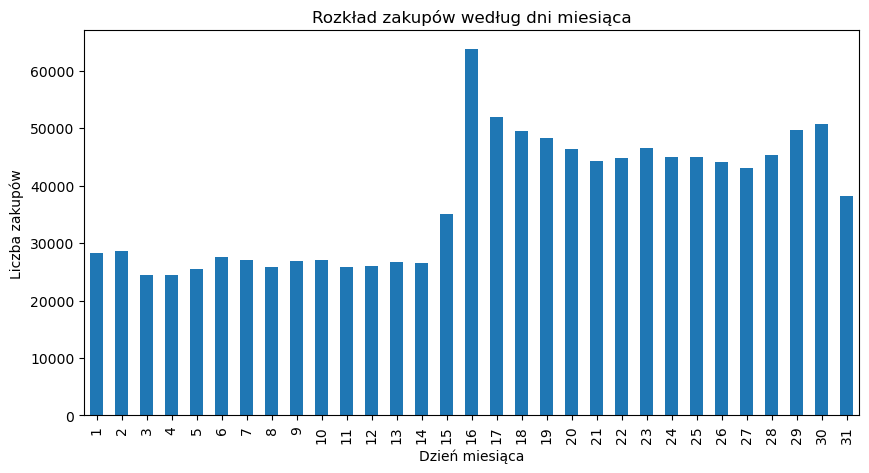

In [25]:
# Wyciągnij dzień miesiąca z czasu zdarzenia
purchases['day_of_month'] = purchases['event_time'].dt.day

# Grupuj zakupy według dni miesiąca
day_of_month_purchases = purchases['day_of_month'].value_counts().sort_index()

print("Rozkład zakupów według dni miesiąca:")
print(day_of_month_purchases)

# Wizualizacja
day_of_month_purchases.plot(kind='bar', title='Rozkład zakupów według dni miesiąca', figsize=(10, 5))
plt.xlabel('Dzień miesiąca')
plt.ylabel('Liczba zakupów')
plt.show()

event_type
view       93.25
cart        5.03
purchase    1.72
Name: proportion, dtype: float64


<Axes: title={'center': 'Rozkład typów zdarzeń'}, xlabel='event_type'>

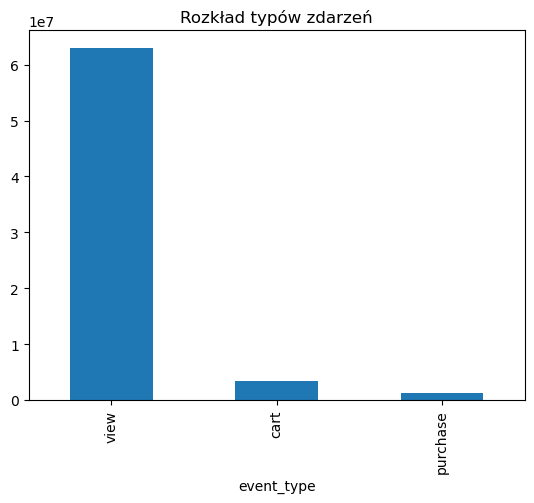

In [13]:
print(df['event_type'].value_counts(normalize=True) * 100)  # Procentowy udział zdarzeń
df['event_type'].value_counts().plot(kind='bar', title='Rozkład typów zdarzeń')  # Wykres


In [14]:
# Filtracja i analiza dla każdego zdarzenia
event_types = df['event_type'].unique()  # Pobierz unikalne typy zdarzeń
for event in event_types:
    print(f"Najpopularniejsze produkty dla zdarzenia: {event}")
    popular_products = df[df['event_type'] == event]['product_id'].value_counts().head(10)
    print(popular_products)
    print()

Najpopularniejsze produkty dla zdarzenia: view
product_id
1004767    704209
1004856    553145
1005115    491605
1005160    347399
1005100    321313
1004870    287146
4804056    277432
1005105    248844
1002544    242808
1004873    236560
Name: count, dtype: int64

Najpopularniejsze produkty dla zdarzenia: purchase
product_id
1004856    34545
1004767    34256
1005115    26464
1005100    23457
4804056    22496
1002544    18606
1004870    13637
1005212    12071
1004249    11435
1005160    10850
Name: count, dtype: int64

Najpopularniejsze produkty dla zdarzenia: cart
product_id
1004767    90325
1004856    81415
1005115    62735
1005100    57100
4804056    54933
1002544    39013
1004870    38335
5100816    34753
1005160    33328
1005212    30750
Name: count, dtype: int64



In [15]:
# Filtracja i analiza dla kategorii
for event in event_types:
    print(f"Najpopularniejsze kategorie dla zdarzenia: {event}")
    popular_categories = df[df['event_type'] == event]['category_code'].value_counts().head(10)
    print(popular_categories)
    print()

Najpopularniejsze kategorie dla zdarzenia: view
category_code
construction.tools.light            14696444
electronics.clocks                   2599867
appliances.personal.massager         2429906
apparel.shoes                        2380654
appliances.kitchen.refrigerators     2275993
sport.bicycle                        2135255
computers.peripherals.printer        1343419
appliances.environment.vacuum        1326078
electronics.audio.headphone          1306549
apparel.shoes.sandals                1047522
Name: count, dtype: int64

Najpopularniejsze kategorie dla zdarzenia: purchase
category_code
construction.tools.light            502073
sport.bicycle                        58750
appliances.personal.massager         45633
apparel.shoes                        38456
electronics.clocks                   37640
appliances.kitchen.refrigerators     31800
appliances.environment.vacuum        22220
appliances.kitchen.washer            19533
electronics.audio.headphone          18887
apparel.

In [16]:
# Filtracja i analiza dla marek
for event in event_types:
    print(f"Najpopularniejsze marki dla zdarzenia: {event}")
    popular_brands = df[df['event_type'] == event]['brand'].value_counts().head(10)
    print(popular_brands)
    print()

Najpopularniejsze marki dla zdarzenia: view
brand
samsung    7574471
apple      4880397
xiaomi     4766990
huawei     1736478
lucente    1197092
lg          878732
sony        853245
bosch       711264
oppo        703464
artel       622026
Name: count, dtype: int64

Najpopularniejsze marki dla zdarzenia: purchase
brand
samsung    265941
apple      209512
xiaomi     101820
huawei      45118
lucente     21714
oppo        19843
sony        16625
lg          16191
artel       11422
lenovo       8711
Name: count, dtype: int64

Najpopularniejsze marki dla zdarzenia: cart
brand
samsung     699987
apple       504848
xiaomi      339829
huawei      121527
lucente      50696
sony         49207
oppo         49111
lg           48934
artel        37153
cordiant     33297
Name: count, dtype: int64



In [26]:
# Filtracja zdarzeń typu 'purchase'
purchase_events = df[df['event_type'] == 'purchase']

In [32]:
# Obliczanie kwartyli
q1, q2, q3 = purchase_events['price'].quantile([0.25, 0.5, 0.75])
print(f"Q1: {q1}, Q2 (mediana): {q2}, Q3: {q3}")

# Definiowanie przedziałów cenowych
bins = [0, q1, q2, q3, purchase_events['price'].max()]
labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins)-1)]

# Tworzenie kolumny z przedziałami cenowymi
purchase_events['price_range'] = pd.cut(purchase_events['price'], bins=bins, labels=labels, include_lowest=True)

# Grupowanie według kategorii i przedziałów cenowych
price_range_analysis = purchase_events.groupby(['category_code', 'price_range']).size().unstack(fill_value=0)


Q1: 84.02, Q2 (mediana): 176.84, Q3: 344.38


/var/folders/rj/74569_hj08dczy17w0prp9br0000gp/T/ipykernel_15907/3907636253.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_events['price_range'] = pd.cut(purchase_events['price'], bins=bins, labels=labels, include_lowest=True)
/var/folders/rj/74569_hj08dczy17w0prp9br0000gp/T/ipykernel_15907/3907636253.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_range_analysis = purchase_events.groupby(['category_code', 'price_range']).size().unstack(fill_value=0)


In [ ]:
# Grupowanie według kategorii i przedziałów cenowych
price_range_analysis = purchase_events.groupby(['category_code', 'price_range']).size().unstack(fill_value=0)

# Procentowy udział zakupów w przedziałach cenowych
price_range_percentage = price_range_analysis.div(price_range_analysis.sum(axis=1), axis=0) * 100

# Wybieramy top 5 kategorii z największą liczbą zakupów
top_categories = price_range_analysis.sum(axis=1).nlargest(5).index

for category in top_categories:
    price_range_analysis.loc[category].plot(kind='bar', title=f'Rozkład Zakupów wg Cen w Kategorii: {category}')
    plt.ylabel('Liczba Zakupów')
    plt.xlabel('Przedział Cenowy')
    plt.xticks(rotation=45)
    plt.show()

In [34]:
session_time = df.groupby('user_session')['event_time'].agg(['min', 'max'])
session_time['duration'] = (session_time['max'] - session_time['min']).dt.total_seconds() / 60
print(session_time['duration'].describe())

count   15581360.00
mean          19.29
std          409.97
min            0.00
25%            0.00
50%            0.58
75%            3.73
max        44584.73
Name: duration, dtype: float64


In [ ]:
# Filtracja zdarzeń typu 'view'
view_events = df[df['event_type'] == 'view']

# Obliczenie średniej liczby `view` produktów na sesję
avg_views_per_session = view_events.groupby('user_session')['product_id'].count().mean()
print(f"Średnia liczba `view` produktów w sesji: {avg_views_per_session}")

Średnia liczba `view` produktów w sesji: 4.043303927731845


In [36]:
# Filtracja zdarzeń typu 'cart'
cart_events = df[df['event_type'] == 'cart']

# Obliczenie średniej liczby `cart` produktów na sesję
avg_carts_per_session = cart_events.groupby('user_session')['product_id'].count().mean()
print(f"Średnia liczba `cart` produktów w sesji: {avg_carts_per_session}")

Średnia liczba `cart` produktów w sesji: 1.7115020163983934


In [37]:
# Obliczenie średniej liczby `view` produktów na użytkownika
avg_views_per_user = view_events.groupby('user_id')['product_id'].count().mean()
print(f"Średnia liczba `view` produktów na użytkownika: {avg_views_per_user}")


Średnia liczba `view` produktów na użytkownika: 13.761565713449226


In [38]:
# Obliczenie średniej liczby `cart` produktów na użytkownika
avg_carts_per_user = cart_events.groupby('user_id')['product_id'].count().mean()
print(f"Średnia liczba `cart` produktów na użytkownika: {avg_carts_per_user}")


Średnia liczba `cart` produktów na użytkownika: 3.6744551793410847


In [39]:
# Filtracja zdarzeń typu 'purchase'
purchase_events = df[df['event_type'] == 'purchase']

# Liczenie liczby zakupów w każdej sesji
purchases_per_session = purchase_events.groupby('user_session')['product_id'].count()

# Obliczenie średniej tylko dla sesji zakończonych `purchase`
avg_purchases_per_purchase_session = purchases_per_session.mean()
print(f"Średnia liczba kupionych produktów w sesjach zakończonych `purchase`: {avg_purchases_per_purchase_session}")

Średnia liczba kupionych produktów w sesjach zakończonych `purchase`: 1.197981453703847


In [40]:
# Liczenie liczby zakupów na użytkownika
purchases_per_user = purchase_events.groupby('user_id')['product_id'].count()

# Obliczenie średniej liczby zakupów na użytkownika
avg_purchases_per_user = purchases_per_user.mean()
print(f"Średnia liczba kupionych produktów na użytkownika: {avg_purchases_per_user}")


Średnia liczba kupionych produktów na użytkownika: 2.319470974876097


In [41]:
# Policzenie unikalnych sesji dla każdego użytkownika
sessions_per_user = df.groupby('user_id')['user_session'].nunique()

# Obliczenie średniej liczby sesji na użytkownika
avg_sessions_per_user = sessions_per_user.mean()

print(f"Średnia liczba sesji na użytkownika: {avg_sessions_per_user}")

Średnia liczba sesji na użytkownika: 3.4044225855276724
